In [2]:
import os
import pandas as pd
import numpy as np

DATA_ROOT = os.environ.get(
    "HABNETIC_DATA",
    r"C:\Users\C.Price\Habnetic\data"
)

df = pd.read_parquet(
    os.path.join(
        DATA_ROOT,
        "processed", "RTM", "priors",
        "building_water_proximity.parquet"
    )
)


In [3]:
eps = 1e-6

df["log_dist_water"] = np.log(df["dist_to_water_m"] + eps)
df["log_wlen_500"] = np.log(df["water_len_density_500m"] + eps)


In [4]:
def zscore(x):
    return (x - x.mean()) / x.std()

df["z_log_dist_water"] = zscore(df["log_dist_water"])
df["z_log_wlen_500"] = zscore(df["log_wlen_500"])


In [5]:
df["E_water_proxy"] = (
    - df["z_log_dist_water"]
    + df["z_log_wlen_500"]
)


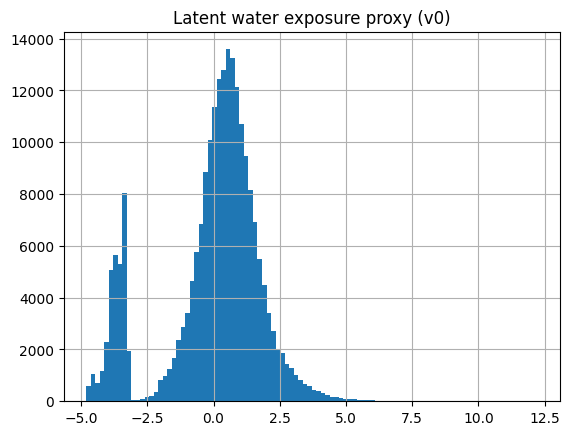

In [6]:
import matplotlib.pyplot as plt

df["E_water_proxy"].hist(bins=100)
plt.title("Latent water exposure proxy (v0)")
plt.show()


## Conclusions (v0)

- Log-transforming distance and density stabilizes distributions
- 500 m density provides a robust neighborhood-scale signal
- A simple linear combination yields a well-behaved latent proxy
- This proxy is suitable for use as a prior input in downstream models

No inference performed.
The latent exposure proxy exhibits mild bimodality, reflecting
structural differences between water-embedded urban cores and
water-sparse peripheral areas. This is considered a feature, not a defect.

